In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint

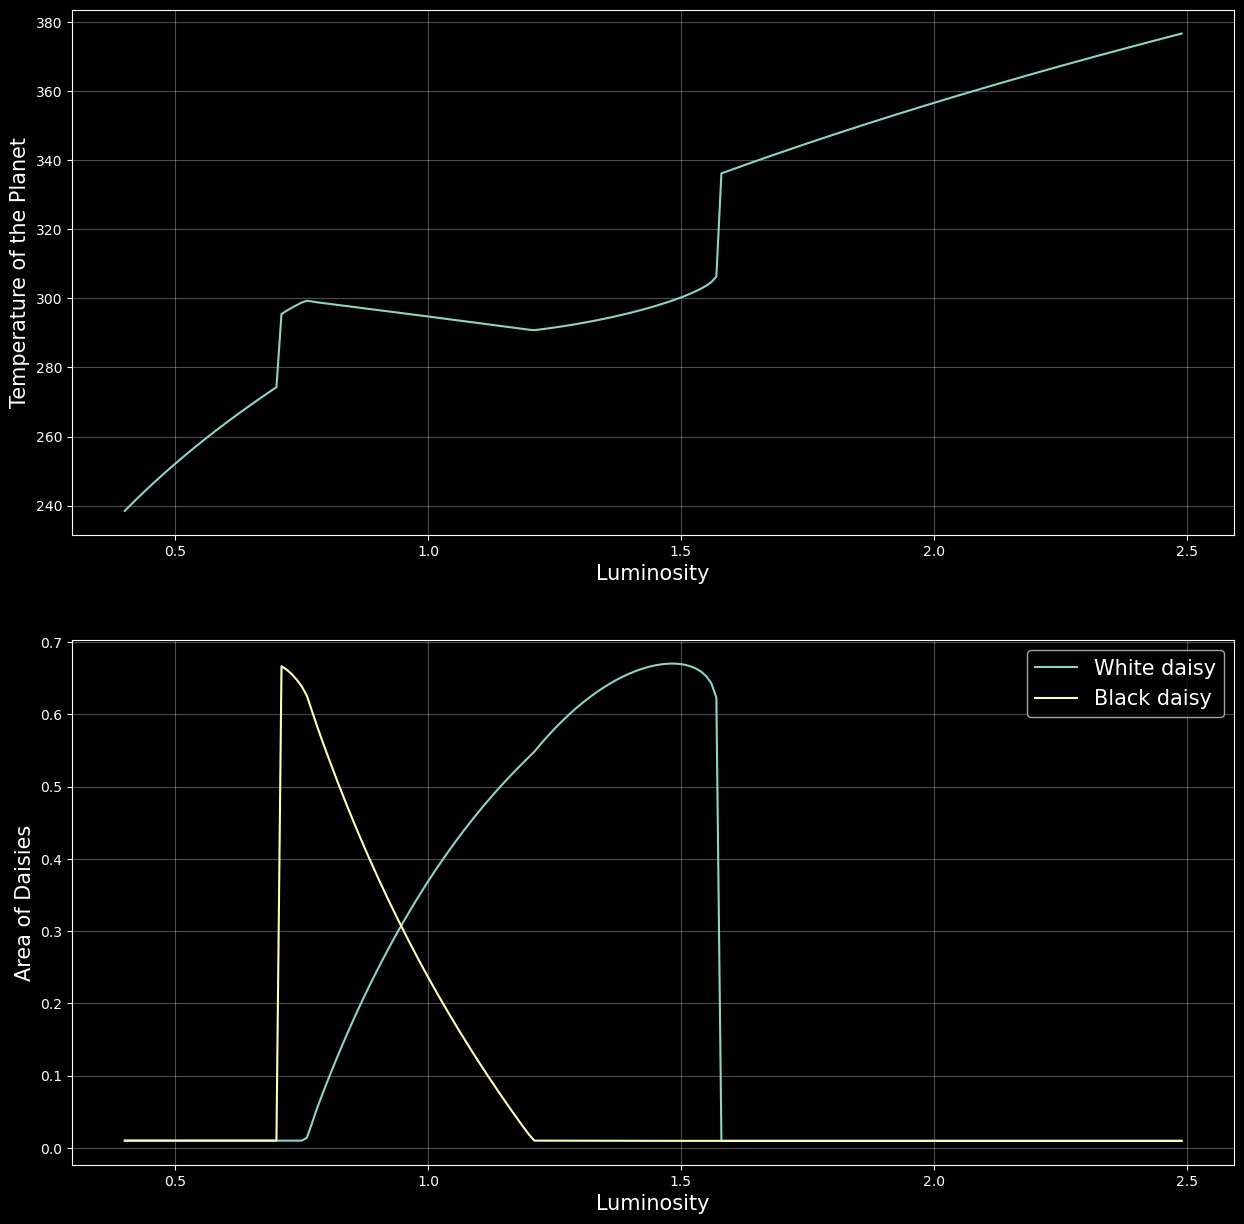

In [143]:
# Tp & Daisies Area vs Luminosity


# Setting constants & initial conditions
R = 0.2
L = 1
S0 = 917
sigma = 5.67*10**(-8)
aw = 0.75
ag = 0.5
Ab = 0.01
Ab_1 = 0.01
ab = 0.25
Aw = 0.01
Aw_1 = 0.01
X = 0.3
dt = 0.1
x = 1 - Aw - Ab - Aw_1 - Ab_1
ap = Aw*aw + Ab*ab + x*ag + Aw_1*aw + Ab_1*ab
Tp = (L*S0*(1-ap)/sigma)**(1/4)
Tmin = 5 + 273.5
Tmax = 40 + 273.5

T_eq = []
Aw_eq = []
Ab_eq = []

# List of different luminosities
L_list = np.arange(0.4, 2.5, 0.01)

for L in L_list:
    Aw_list = [Aw,]
    Ab_list = [Ab,]
    Aw1_list = [Aw_1]
    Ab1_list = [Ab_1]
    Tp_list = [Tp]

    for i in range(1000):
        x = 1 - Aw - Ab - Aw_1 - Ab_1
        ap = Aw*aw + Ab*ab + x*ag + Aw_1*aw + Ab_1*ab
        Tp = (L*S0*(1-ap)/sigma)**(1/4)

        Tw = (R*L*S0*(ap - aw)/sigma + Tp**4)**(1/4)
        if Tw <= Tmax and Tw >= Tmin:
            bw = 1.0-0.003265*(295.5-Tw)**2
        else:
            bw = 0
        Tb = (R*L*S0*(ap - ab)/sigma + Tp**4)**(1/4)
        if Tb <= Tmax and Tb >= Tmin:
            bb = 1.0-0.003265*(295.5-Tb)**2
        else:
            bb = 0
        dAw = Aw*(bw*x - X)*dt
        dAb = Ab*(bb*x - X)*dt
    
        if Aw < 0.01:
            Aw = 0.01
        else:
            Aw += dAw
      
        if Ab < 0.01:
            Ab = 0.01
        else:
            Ab += dAb
        Aw_list.append(Aw)
        Ab_list.append(Ab)
        Tp_list.append(Tp)
    
  
    T_eq.append(Tp_list[-1])
    Aw_eq.append(Aw_list[-1])
    Ab_eq.append(Ab_list[-1])

  
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (15, 15))
ax[0].plot(L_list, T_eq)
ax[0].set_xlabel("Luminosity", fontsize = 15)
ax[0].set_ylabel("Temperature of the Planet", fontsize = 15)
ax[1].plot(L_list, Aw_eq, label = "White daisy")
ax[1].plot(L_list, Ab_eq, label = "Black daisy")
ax[1].legend(fontsize = 15)
ax[1].set_ylabel("Area of Daisies", fontsize = 15)
ax[1].set_xlabel("Luminosity", fontsize = 15)
ax[0].grid(alpha = 0.3)
ax[1].grid(alpha = 0.3)
plt.style.use("dark_background")

plt.show()

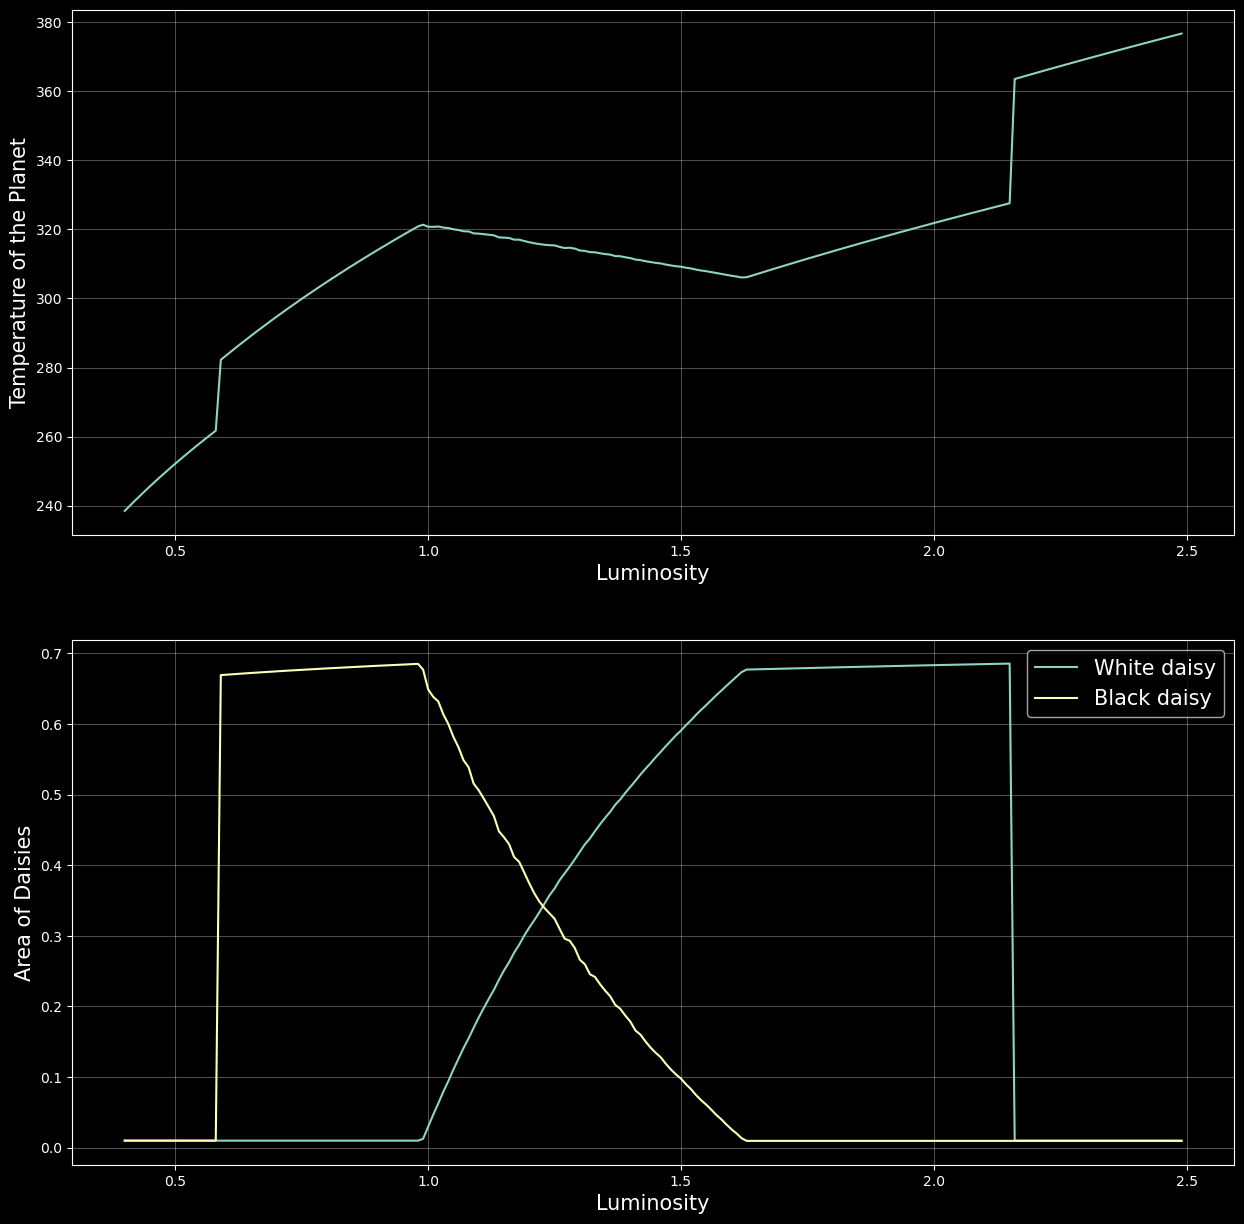

In [142]:
# Tp & Daisies Area vs Luminosity
# Daisies have stronger tolerance against extreme climate

R = 0.2
L = 1
S0 = 917
sigma = 5.67*10**(-8)
aw = 0.75
ag = 0.5
Ab = 0.01
ab = 0.25
Aw = 0.01
X = 0.3
dt = 0.1
x = 1 - Aw - Ab 
ap = Aw*aw + Ab*ab + x*ag
Tp = (L*S0*(1-ap)/sigma)**(1/4)
Tmin = -5 + 273.5
Tmax = 50 + 273.5
m = 0.95
r = 27.5

T_eq = []
Aw_eq = []
Ab_eq = []


L_list = np.arange(0.4, 2.5, 0.01)

for L in L_list:
    Aw_list = [Aw,]
    Ab_list = [Ab,]
    Aw1_list = [Aw_1]
    Ab1_list = [Ab_1]
    Tp_list = [Tp]

    for i in range(1000):
        x = 1 - Aw - Ab
        ap = Aw*aw + Ab*ab + x*ag 
        Tp = (L*S0*(1-ap)/sigma)**(1/4)

        Tw = (R*L*S0*(ap - aw)/sigma + Tp**4)**(1/4)
        if Tw <= Tmax and Tw >= Tmin:
            bw = m*(1-((295.5 - Tw)/r**2))
        else:
            bw = 0
        Tb = (R*L*S0*(ap - ab)/sigma + Tp**4)**(1/4)
        if Tb <= Tmax and Tb >= Tmin:
            bb = m*(1-((295.5 - Tb)/r**2))
        else:
            bb = 0
        dAw = Aw*(bw*x - X)*dt
        dAb = Ab*(bb*x - X)*dt
            
        if Aw < 0.01:
            Aw = 0.01
        else:
            Aw += dAw
      
        if Ab < 0.01:
            Ab = 0.01
        else:
            Ab += dAb
        Aw_list.append(Aw)
        Ab_list.append(Ab)
        Tp_list.append(Tp)
    
  
    T_eq.append(Tp_list[-1])
    Aw_eq.append(Aw_list[-1])
    Ab_eq.append(Ab_list[-1])

  
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (15, 15))
ax[0].plot(L_list, T_eq)
ax[0].set_xlabel("Luminosity", fontsize = 15)
ax[0].set_ylabel("Temperature of the Planet", fontsize = 15)
ax[1].plot(L_list, Aw_eq, label = "White daisy")
ax[1].plot(L_list, Ab_eq, label = "Black daisy")
ax[1].legend(fontsize = 15)
ax[1].set_ylabel("Area of Daisies", fontsize = 15)
ax[1].set_xlabel("Luminosity", fontsize = 15)
ax[0].grid(alpha = 0.3)
ax[1].grid(alpha = 0.3)
plt.style.use("dark_background")

plt.show()

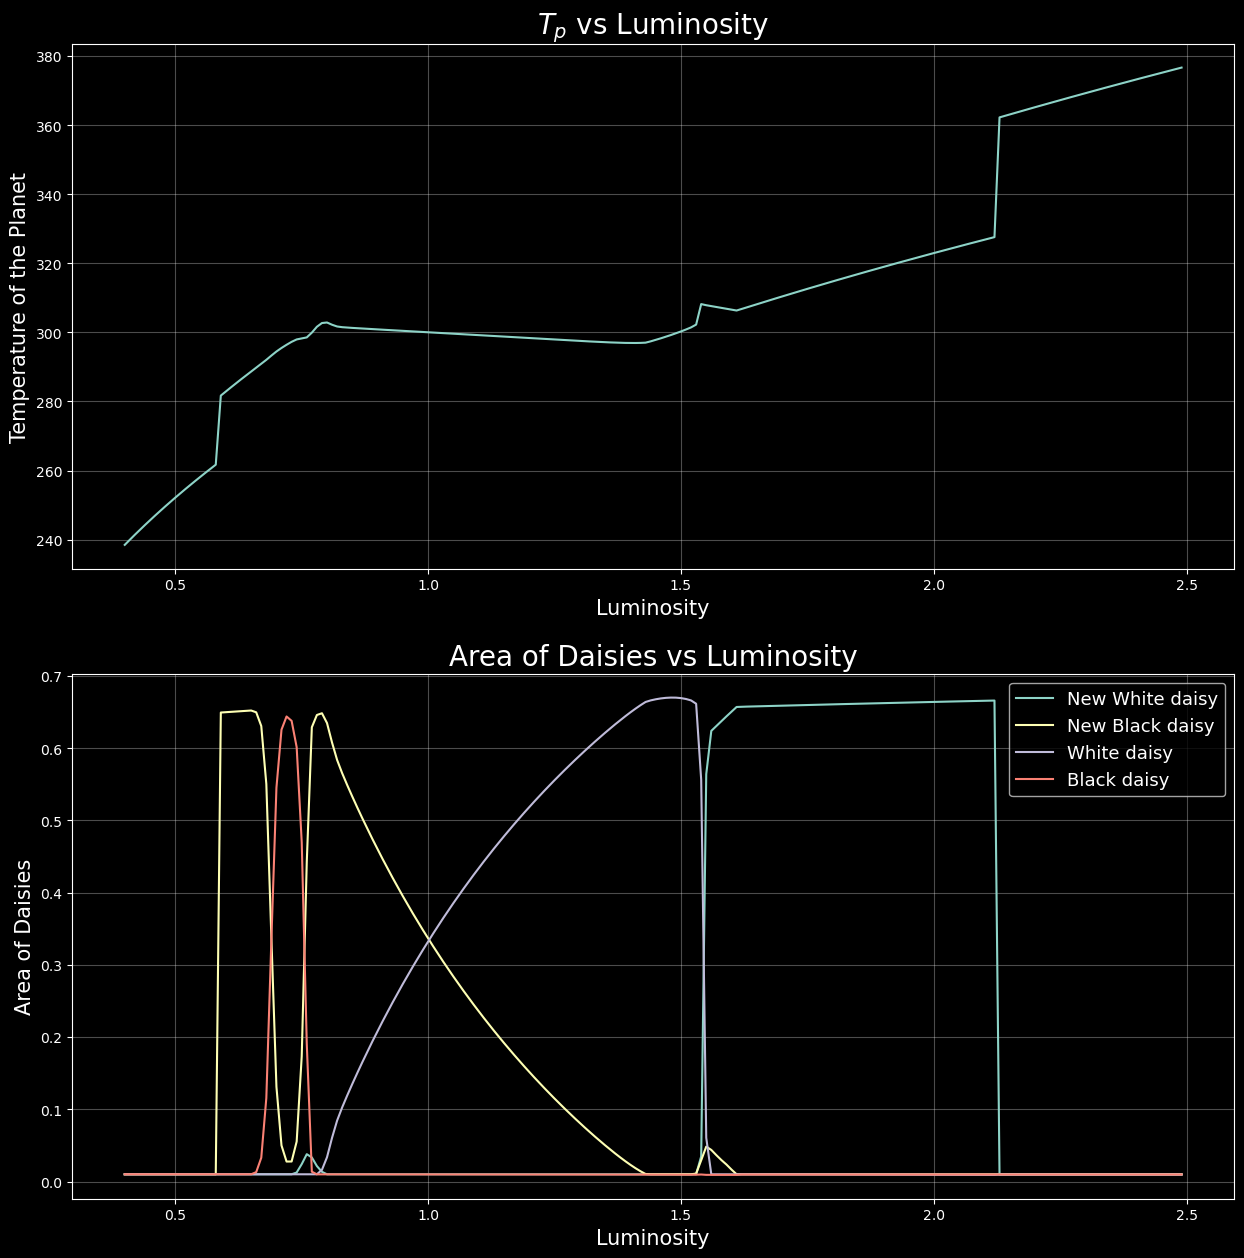

In [141]:
# Combination of the previous two plots
# Old daisies & New daisies co-exist

R = 0.2
L = 1
S0 = 917
sigma = 5.67*10**(-8)
aw = 0.75
ag = 0.5
Ab = 0.01
Ab_1 = 0.01
ab = 0.25
Aw = 0.01
Aw_1 = 0.01
X = 0.3
dt = 0.1
x = 1 - Aw - Ab - Aw_1 - Ab_1
ap = Aw*aw + Ab*ab + x*ag + Aw_1*aw + Ab_1*ab
Tp = (L*S0*(1-ap)/sigma)**(1/4)
Tmin = -5 + 273.5
Tmax = 50 + 273.5
m = 0.95
r = 27.5

T_eq = []
Aw_eq = []
Ab_eq = []
Aw1_eq = []
Ab1_eq = []


L_list = np.arange(0.4, 2.5, 0.01)

for L in L_list:
    Aw_list = [Aw,]
    Ab_list = [Ab,]
    Aw1_list = [Aw_1]
    Ab1_list = [Ab_1]
    Tp_list = [Tp]

    for i in range(1000):
        x = 1 - Aw - Ab - Aw_1 - Ab_1
        ap = Aw*aw + Ab*ab + x*ag + Aw_1*aw + Ab_1*ab
        Tp = (L*S0*(1-ap)/sigma)**(1/4)

        Tw = (R*L*S0*(ap - aw)/sigma + Tp**4)**(1/4)
        if Tw <= Tmax and Tw >= Tmin:
            bw = m*(1-((295.5 - Tw)/r**2))
        else:
            bw = 0
        Tb = (R*L*S0*(ap - ab)/sigma + Tp**4)**(1/4)
        if Tb <= Tmax and Tb >= Tmin:
            bb = m*(1-((295.5 - Tb)/r**2))
        else:
            bb = 0
            
        Tw_1 = (R*L*S0*(ap - aw)/sigma + Tp**4)**(1/4)
        if Tw_1 <= Tmax and Tw_1 >= Tmin:
            bw_1 = 1.0-0.003265*(295.5-Tw_1)**2
        else:
            bw_1 = 0
        
        Tb_1 = (R*L*S0*(ap - ab)/sigma + Tp**4)**(1/4)
        if Tb_1 <= Tmax and Tb_1 >= Tmin:
            bb_1 = 1.0-0.003265*(295.5-Tb_1)**2
        else:
            bb_1 = 0
            
        dAw = Aw*(bw*x - X)*dt
        dAb = Ab*(bb*x - X)*dt
        dAw_1 = Aw_1*(bw_1*x - X)*dt
        dAb_1 = Ab_1*(bb_1*x - X)*dt
        
    
        if Aw < 0.01:
            Aw = 0.01
        else:
            Aw += dAw
      
        if Ab < 0.01:
            Ab = 0.01
        else:
            Ab += dAb
            
        if Ab_1 < 0.01:
            Ab_1 = 0.01
        else:
            Ab_1 += dAb_1
            
        if Aw_1 < 0.01:
            Aw_1 = 0.01
        else:
            Aw_1 += dAw_1
        Aw_list.append(Aw)
        Ab_list.append(Ab)
        Aw1_list.append(Aw_1)
        Ab1_list.append(Ab_1)
        Tp_list.append(Tp)
    
  
    T_eq.append(Tp_list[-1])
    Aw_eq.append(Aw_list[-1])
    Ab_eq.append(Ab_list[-1])
    Aw1_eq.append(Aw1_list[-1])
    Ab1_eq.append(Ab1_list[-1])
   
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (15, 15))
ax[0].plot(L_list, T_eq)
ax[0].set_xlabel("Luminosity", fontsize = 15)
ax[0].set_ylabel("Temperature of the Planet", fontsize = 15)
ax[0].set_title("$T_{p}$ vs Luminosity", fontsize = 20)
ax[1].plot(L_list, Aw_eq, label = "New White daisy")
ax[1].plot(L_list, Ab_eq, label = "New Black daisy")
ax[1].plot(L_list, Aw1_eq, label = "White daisy")
ax[1].plot(L_list, Ab1_eq, label = "Black daisy")
ax[1].legend(fontsize = 13)
ax[1].set_ylabel("Area of Daisies", fontsize = 15)
ax[1].set_xlabel("Luminosity", fontsize = 15)
ax[1].set_title("Area of Daisies vs Luminosity", fontsize = 20)
ax[0].grid(alpha = 0.3)
ax[1].grid(alpha = 0.3)

plt.style.use("dark_background")

plt.show()

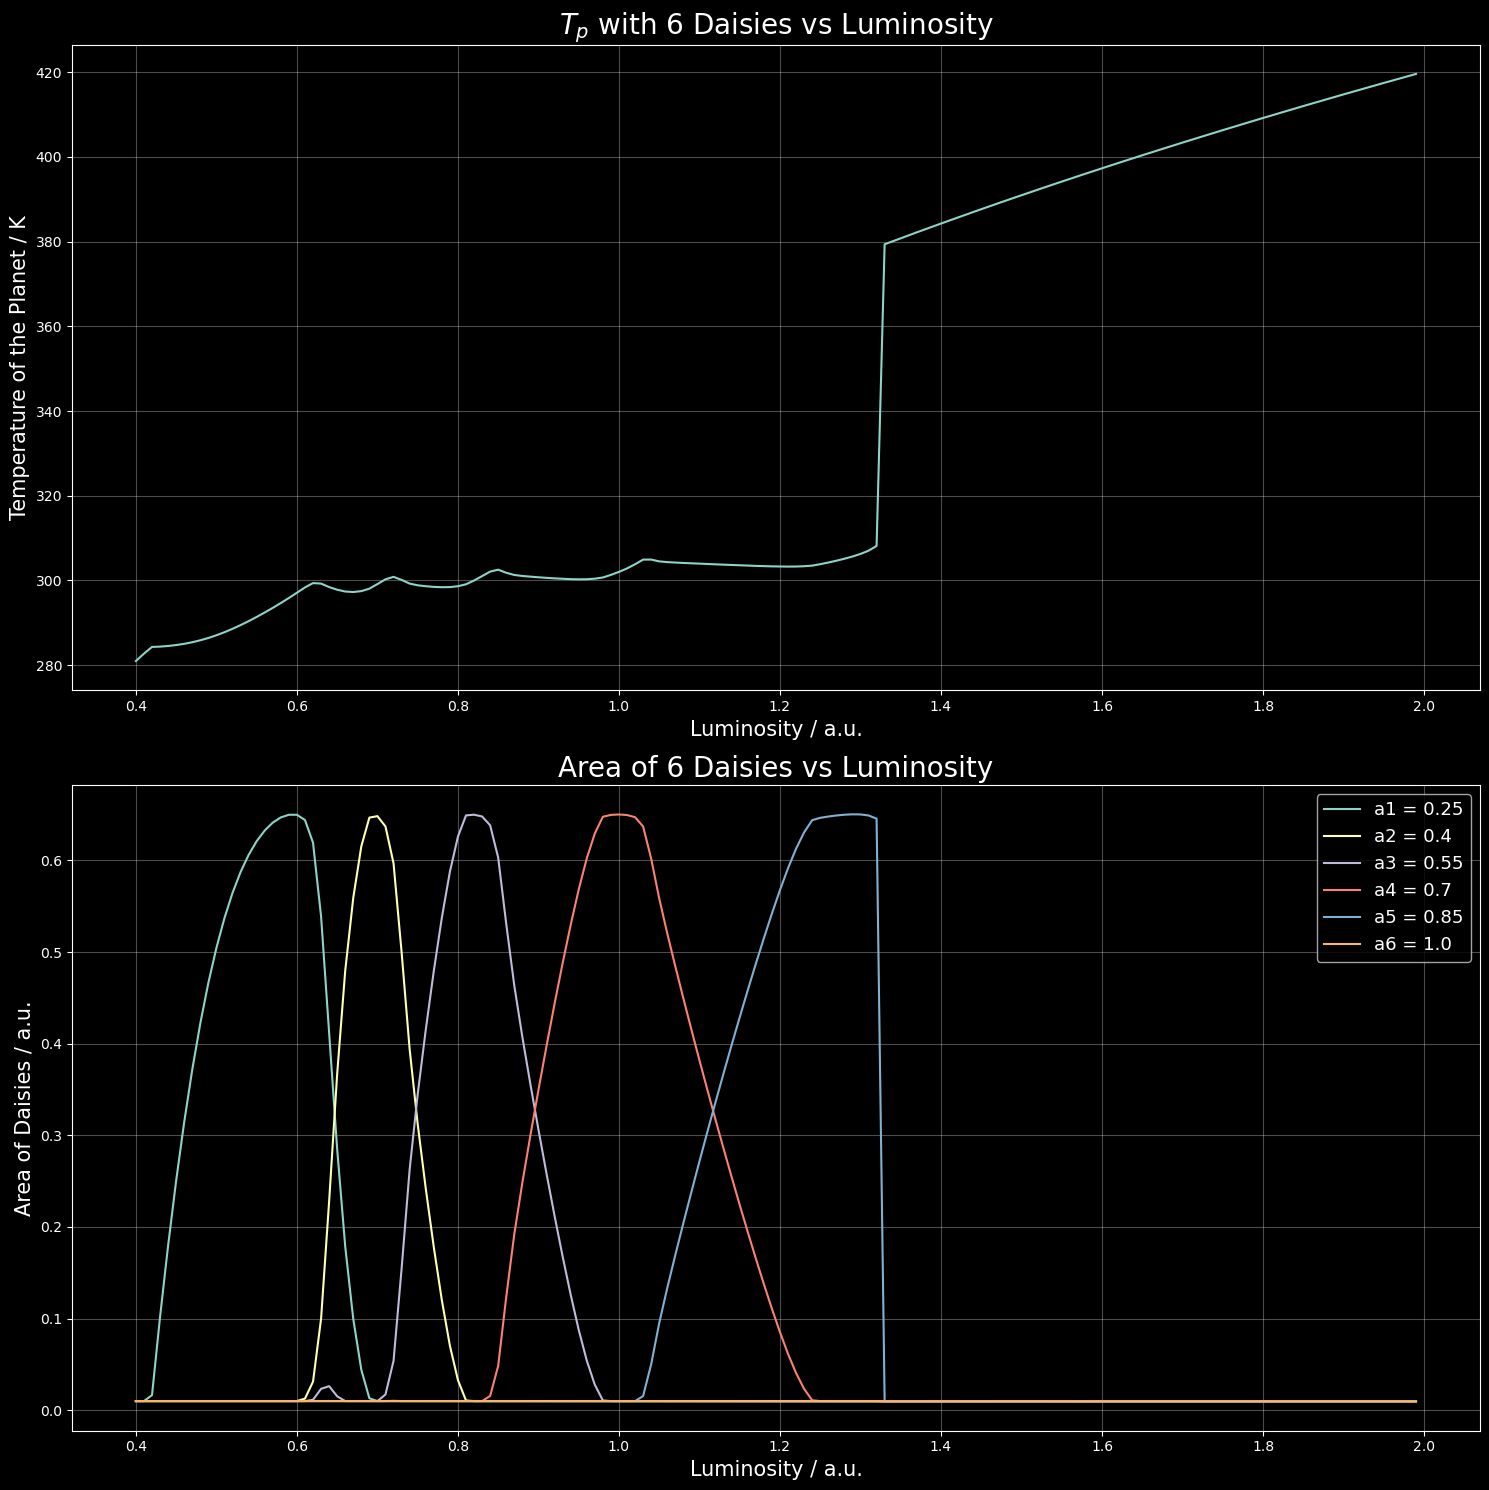

In [202]:
# Daisies of a rainbow spectrum, i.e. daisies with different albedos coexist

R = 0.2
L = 1
S0 = 917
sigma = 5.67*10**(-8)
a1 = 0.25
a2 = 0.40
a3 = 0.55
a4 = 0.70
a5 = 0.85
a6 = 1.00
ag = 0.5
A1 = 0.01
A2 = 0.01
A3 = 0.01
A4 = 0.01
A5 = 0.01
A6 = 0.01

X = 0.3
dt = 0.1
x = 1 - A1 - A2 - A3 - A4 - A5 - A6
ap = A1*a1 + A2*a2 + A3*a3 + A4*a4 + A5*a5 + A6*a6
Tp = (L*S0*(1-ap)/sigma)**(1/4)
Tmin = 5 + 273.5
Tmax = 40 + 273.5


T_eq = []
A1_eq = []
A2_eq = []
A3_eq = []
A4_eq = []
A5_eq = []
A6_eq = []


L_list = np.arange(0.4, 2, 0.01)

for L in L_list:
    A1_list = [A1,]
    A2_list = [A2,]
    A3_list = [A3,]
    A4_list = [A4,]
    A5_list = [A5,]
    A6_list = [A6,]
    Tp_list = [Tp]

    for i in range(1000):
        x = 1 - A1 - A2 - A3 - A4 - A5 - A6
        ap = A1*a1 + A2*a2 + A3*a3 + A4*a4 + A5*a5 + A6*a6
        Tp = (L*S0*(1-ap)/sigma)**(1/4)

        T1 = (R*L*S0*(ap - a1)/sigma + Tp**4)**(1/4)
        if T1 <= Tmax and T1 >= Tmin:
            b1 = 1 - (0.003265*(295.5-T1)**2)
        else:
            b1 = 0
        T2 = (R*L*S0*(ap - a2)/sigma + Tp**4)**(1/4)
        if T2 <= Tmax and T2 >= Tmin:
            b2 = 1 - (0.003265*(295.5-T2)**2)
        else:
            b2 = 0
        T3 = (R*L*S0*(ap - a3)/sigma + Tp**4)**(1/4)
        if T3 <= Tmax and T3 >= Tmin:
            b3 = 1 - (0.003265*(295.5-T3)**2)
        else:
            b3 = 0
        T4 = (R*L*S0*(ap - a4)/sigma + Tp**4)**(1/4)
        if T4 <= Tmax and T4 >= Tmin:
            b4 = 1 - (0.003265*(295.5-T4)**2)
        else:
            b4 = 0
        T5 = (R*L*S0*(ap - a5)/sigma + Tp**4)**(1/4)
        if T5 <= Tmax and T5 >= Tmin:
            b5 = 1 - (0.003265*(295.5-T5)**2)
        else:
            b5 = 0
        T6 = (R*L*S0*(ap - a6)/sigma + Tp**4)**(1/4)
        if T6 <= Tmax and T6 >= Tmin:
            b6 = 1 - (0.003265*(295.5-T6)**2)
        else:
            b6 = 0
        dA1 = A1*(b1*x - X)*dt
        dA2 = A2*(b2*x - X)*dt
        dA3 = A3*(b3*x - X)*dt
        dA4 = A4*(b4*x - X)*dt
        dA5 = A5*(b5*x - X)*dt
        dA6 = A6*(b6*x - X)*dt
    
        if A1 < 0.01:
            A1 = 0.01
        else:
            A1 += dA1
      
        if A2 < 0.01:
            A2 = 0.01
        else:
            A2 += dA2
        
        if A3 < 0.01:
            A3 = 0.01
        else:
            A3 += dA3
        
        if A4 < 0.01:
            A4 = 0.01
        else:
            A4 += dA4
        
        if A5 < 0.01:
            A5 = 0.01
        else:
            A5 += dA5
        
        if A6 < 0.01:
            A6 = 0.01
        else:
            A6 += dA6
            
        A1_list.append(A1)
        A2_list.append(A2)
        A3_list.append(A3)
        A4_list.append(A4)
        A5_list.append(A5)
        A6_list.append(A6)
        Tp_list.append(Tp)
    
  
    T_eq.append(Tp_list[-1])
    A1_eq.append(A1_list[-1])
    A2_eq.append(A2_list[-1])
    A3_eq.append(A3_list[-1])
    A4_eq.append(A4_list[-1])
    A5_eq.append(A5_list[-1])
    A6_eq.append(A6_list[-1])
    

  
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (15, 15))
ax[0].plot(L_list, T_eq)
ax[0].set_xlabel("Luminosity / a.u.", size = 15)
ax[0].set_ylabel("Temperature of the Planet / K", size = 15)
ax[0].set_title("$T_{p}$ with 6 Daisies vs Luminosity", fontsize = 20)
ax[1].plot(L_list, A1_eq, label = f"a1 = {a1}")
ax[1].plot(L_list, A2_eq, label = f"a2 = {a2}")
ax[1].plot(L_list, A3_eq, label = f"a3 = {a3}")
ax[1].plot(L_list, A4_eq, label = f"a4 = {a4}")
ax[1].plot(L_list, A5_eq, label = f"a5 = {a5}")
ax[1].plot(L_list, A6_eq, label = f"a6 = {a6}")
ax[1].legend(fontsize = 13)
ax[1].set_xlabel("Luminosity / a.u.", size = 15)
ax[1].set_ylabel("Area of Daisies / a.u.", size = 15)
ax[1].set_title("Area of 6 Daisies vs Luminosity", fontsize = 20)
ax[0].grid(alpha = 0.3)
ax[1].grid(alpha = 0.3)

plt.tight_layout()
plt.show()

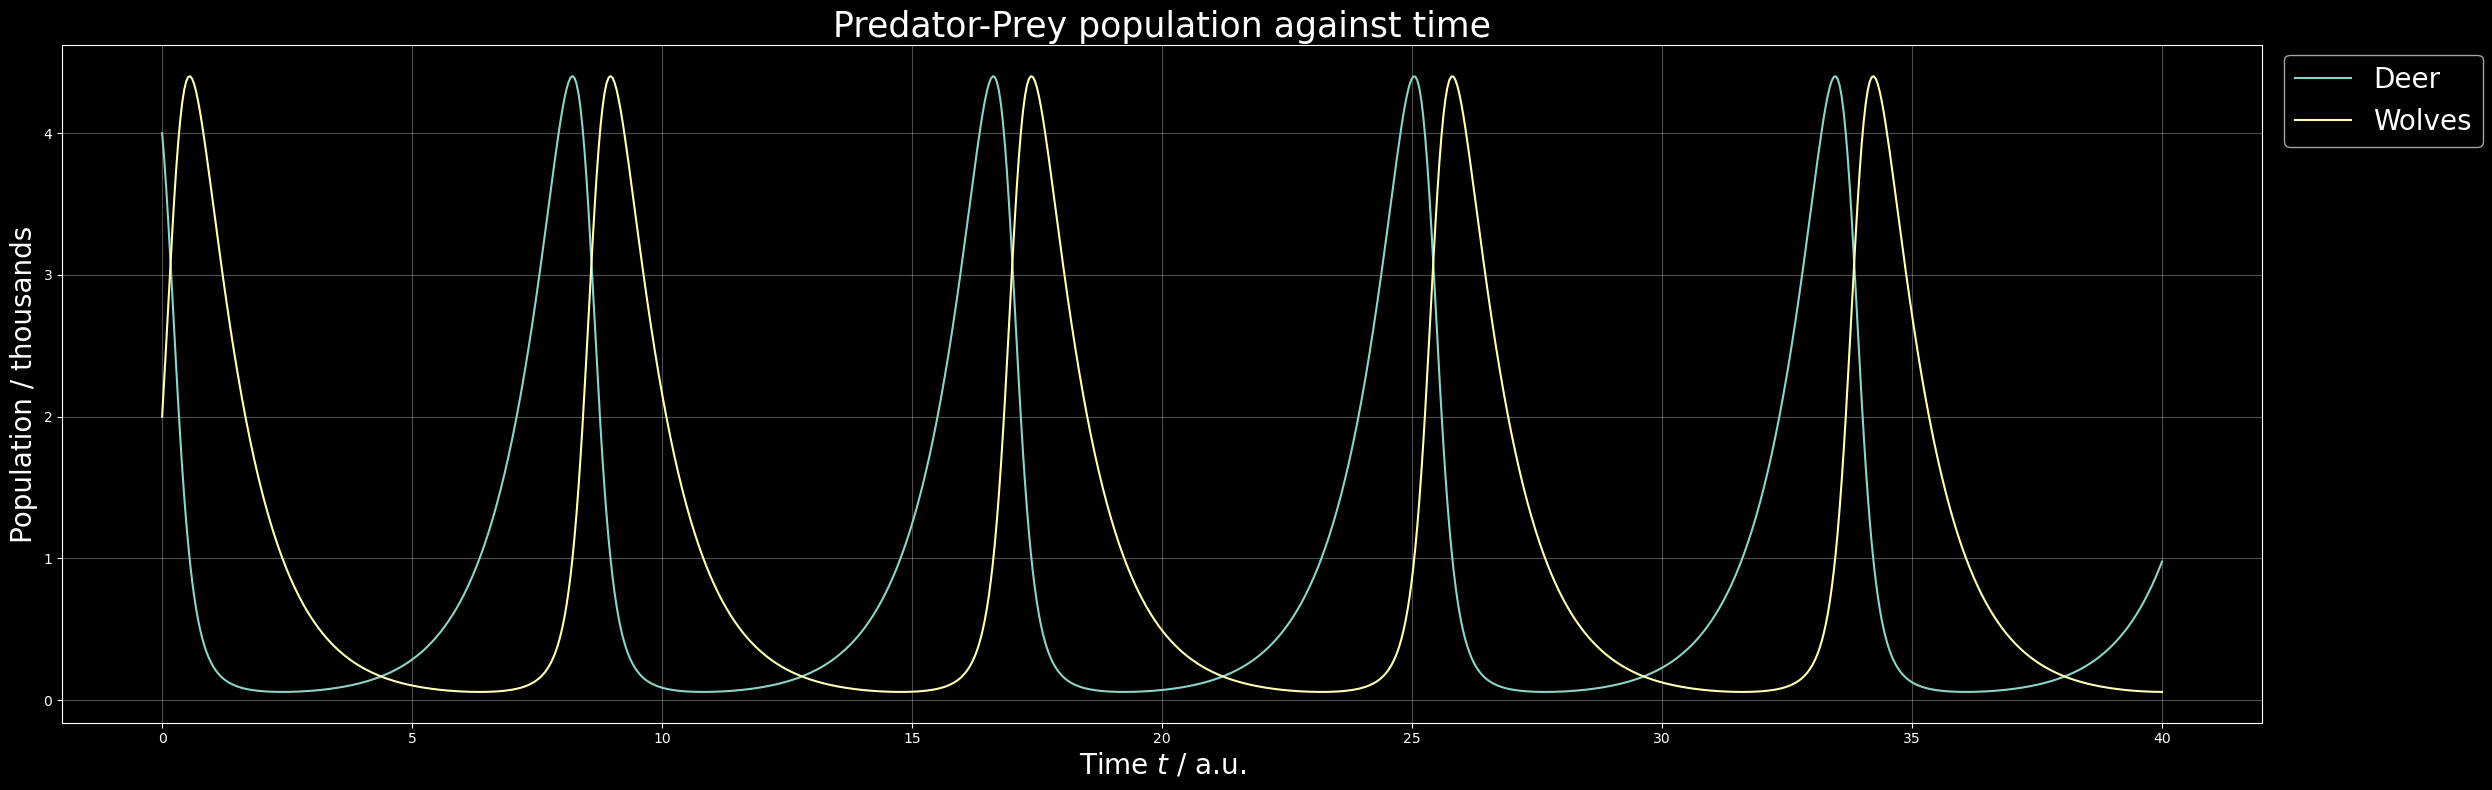

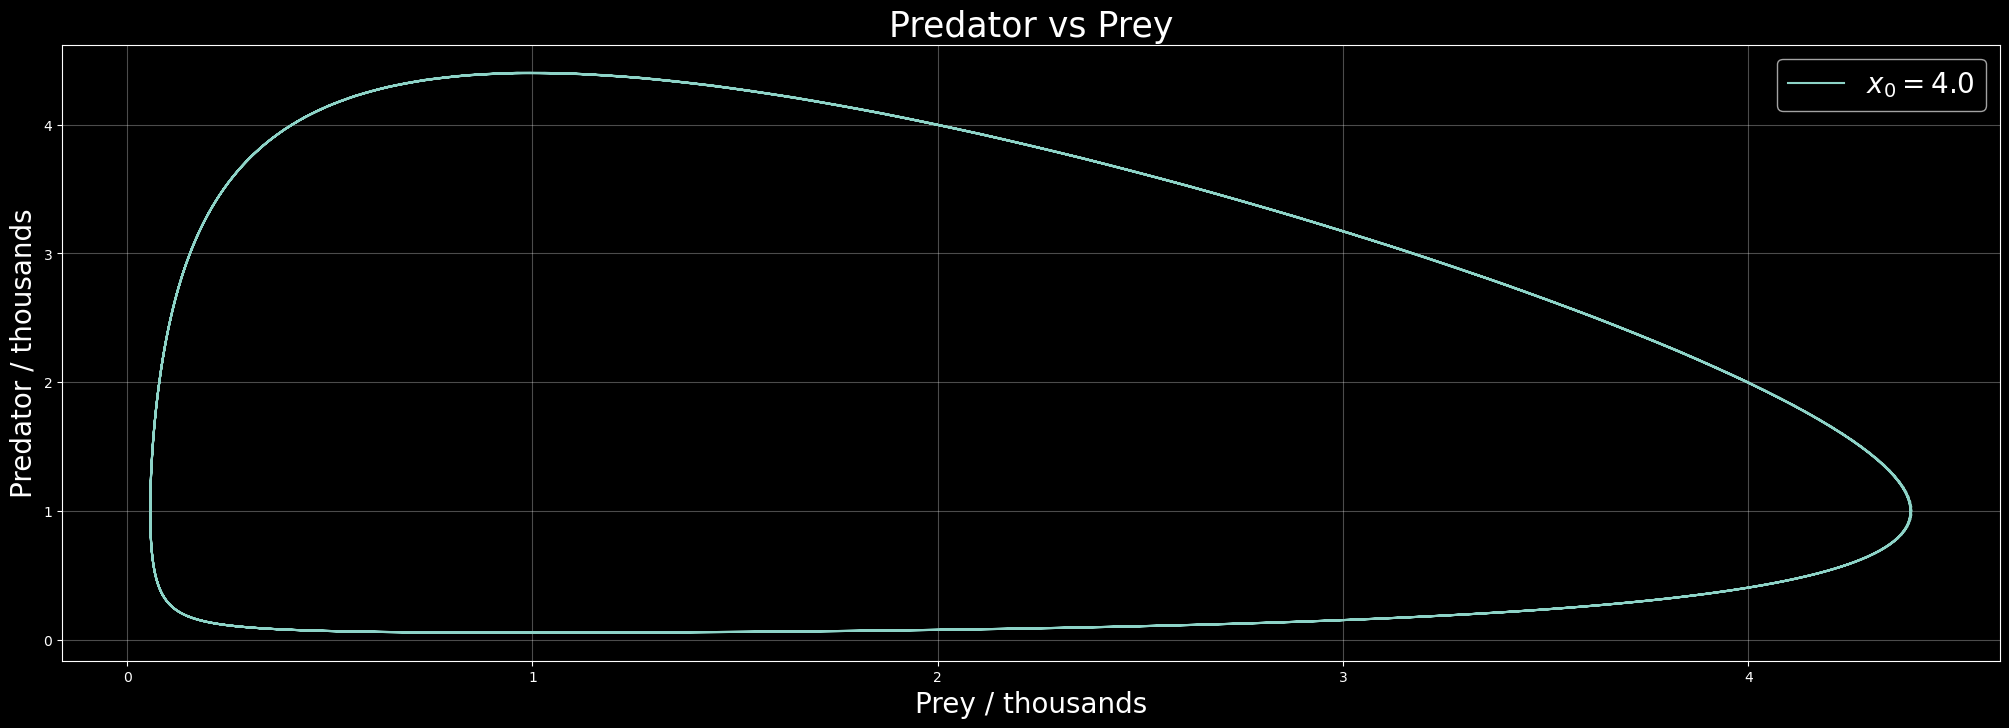

In [154]:
# Basic Lotka-Volterra Model
# Defining each constant to simulate prey-predator population dynamics under a particular set of conditions

alpha = 1.  # growth rate of prey
beta = 1.   # feeding rate of prey by predator
delta = 1.  # mortality rate of predators
gamma = 1.  # growth of predators due to feeding 
x0 = 4.     # initial value of prey
y0 = 2.     # initial value of predator

#A function containing the two differential equations
def derivative(X, t, alpha, beta, delta, gamma):
    x, y = X
    dotx = x * (alpha - beta * y)
    doty = y * (-delta + gamma * x)
    return np.array([dotx, doty])

### Plot a typical population time plot using Lotka-Volterra model ###

plt.figure(figsize = (25,8))

# Initial conditions and time steps
Nt = 1000
tmax = 40
t = np.linspace(0,tmax, Nt)
X0 = [x0, y0]

# Integrate.odeint(derivative, X0, t, args) means take derivatives of derivative(), in this case
# an array of 2 differential equations of shape (Nt,2), X0 is initial value of x and y, t is a series of time stpes used to solve the equations 
res = odeint(derivative, X0, t, args = (alpha, beta, delta, gamma))
x, y = res.T

# Plotting the differential equations
plt.plot(t, x,  label = 'Deer')
plt.plot(t, y,  label = "Wolves")

# Labelling
plt.grid(alpha = 0.3)
plt.title("Predator-Prey population against time", size = 25)
plt.xlabel('Time $t$ / a.u.', size = 20)
plt.ylabel('Population / thousands',size = 20)
plt.legend(loc = (1.01, 0.85), fontsize = 20)
plt.tight_layout()
plt.show()


plt.figure(figsize = (25,8))
Xs = odeint(derivative, X0, t, args = (alpha, beta, delta, gamma))
plt.plot(Xs[:,0], Xs[:,1], "-", label = "$x_0 =$"+str(X0[0]))
    
# Labelling
plt.xlabel("Prey / thousands", size = 20)
plt.ylabel("Predator / thousands", size = 20)
plt.legend(fontsize = 20)
plt.title("Predator vs Prey", size = 25)
plt.grid(alpha = 0.3)

plt.show()

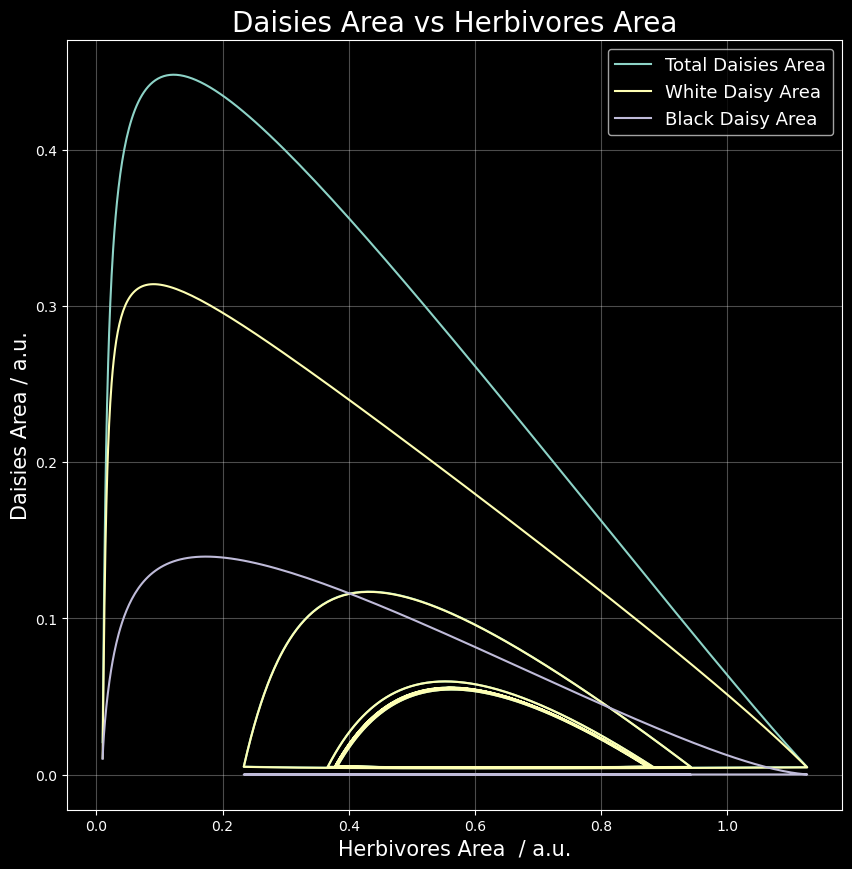

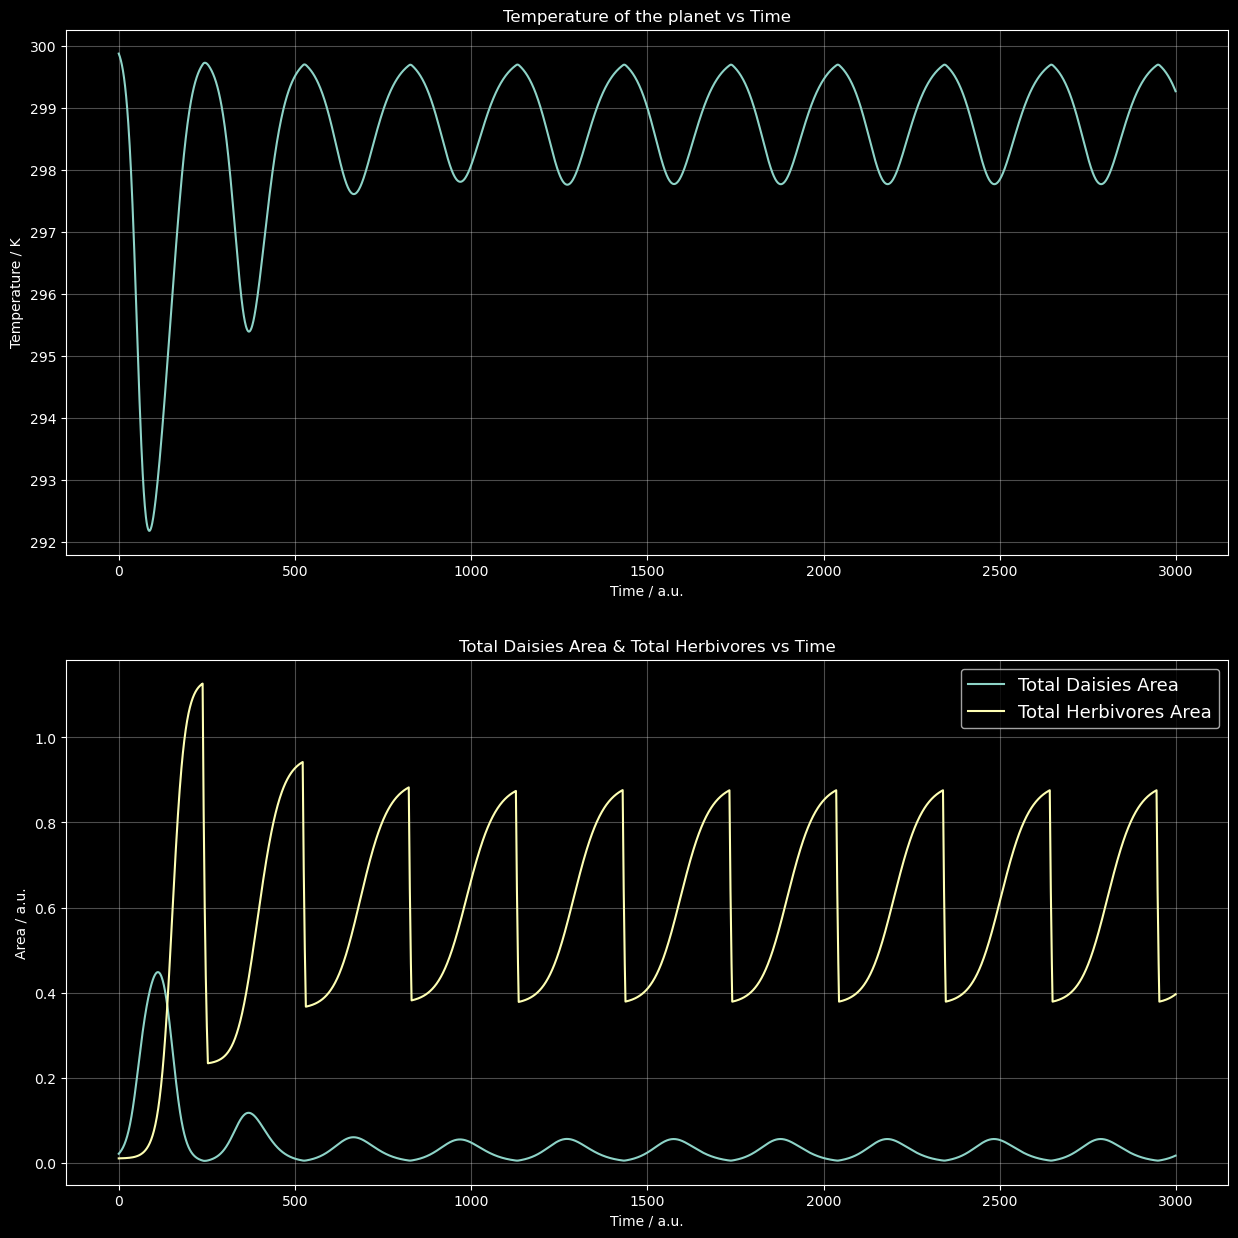

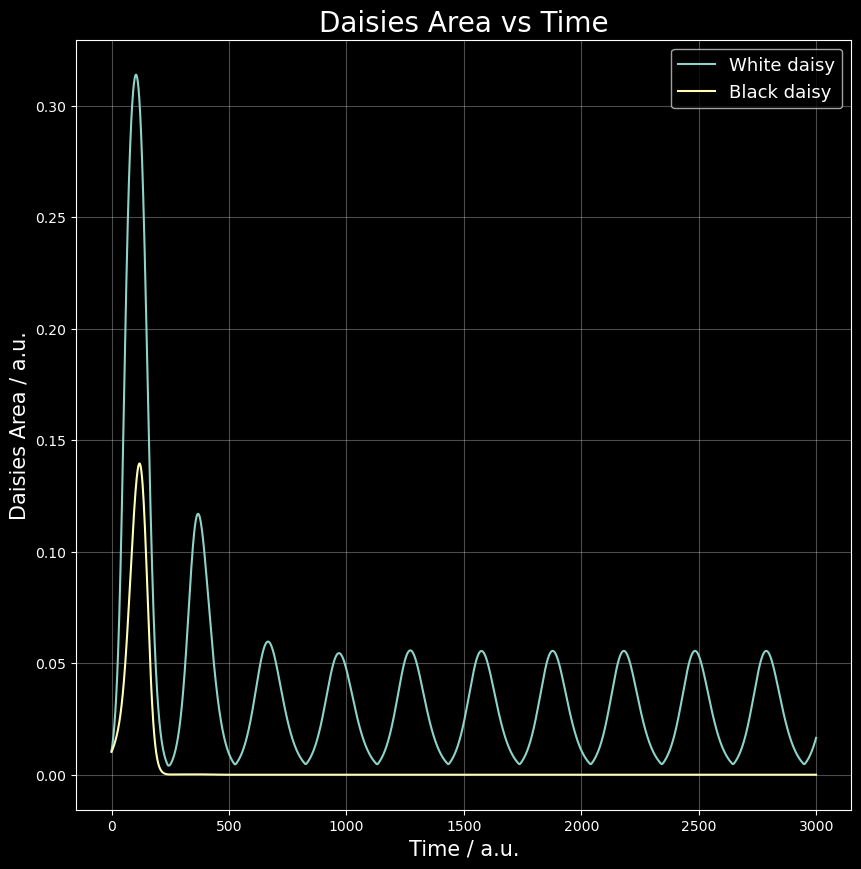

In [205]:
# Integration of Lotka-Volterra model into Daisy World
# A herbivore is added into the system

# initial values & constants
R = 0.2
L = 1
S0 = 917
sigma = 5.67*10**(-8)
aw = 0.75
ag = 0.5
ab = 0.25
Ab = 0.01
Aw = 0.01
X = 0.3
dt = 0.1
Tmin = 5 + 273.5
Tmax = 40 + 273.5
w = 1
k = 1
l = 1


Aw_list = []
Ab_list = []
Tp_list = []
Tw_list = []
Tb_list = []
bb_list = []
y_list = []

def plot(Aw, Ab, y):
    for i in range(3000):
        x = 1 - Aw - Ab
        ap = Aw*aw + Ab*ab + x*ag
        Tp = (L*S0*(1-ap)/sigma)**(1/4)

        Tw = (R*L*S0*(ap - aw)/sigma + Tp**4)**(1/4)
        
        if Tw >= Tmin and Tw <= Tmax:
            bw = 1.0-0.003265*(295.5-Tw)**2
            by = 1
        else:
            bw = 0
            by = 0
            
        Tb = (R*L*S0*(ap - ab)/sigma + Tp**4)**(1/4)
        if Tb >= Tmin and Tb <= Tmax:
            bb = 1.0-0.003265*(295.5-Tb)**2
            by = 1
        else:
            bb = 0
            by = 0
        if Aw + Ab <= 0.005:
            by = 0
        dAw = Aw*(bw*x - X - (w*y))*dt
        dAb = Ab*(bb*x - X - (w*y))*dt
        dy = y*(-k + l*(Aw + Ab) + by) * dt
        
        Aw += dAw
        Ab += dAb
        y += dy
        
        Aw_list.append(Aw)
        Ab_list.append(Ab)
        Tp_list.append(Tp)
        Tw_list.append(Tw)
        Tb_list.append(Tb)
        y_list.append(y)

  



plot(Aw = 0.01, Ab = 0.01, y = 0.01)
Aw_list = np.array(Aw_list)
Ab_list = np.array(Ab_list)
A_list = Aw_list + Ab_list

plt.figure(figsize = (10, 10))
plt.plot(y_list, A_list, label = "Total Daisies Area")
plt.plot(y_list, Aw_list, label = "White Daisy Area")
plt.plot(y_list, Ab_list, label = "Black Daisy Area")
plt.legend(fontsize = 13)
plt.xlabel("Herbivores Area  / a.u.", fontsize = 15)
plt.ylabel("Daisies Area / a.u.", fontsize = 15)
plt.title("Daisies Area vs Herbivores Area", fontsize = 20)
plt.grid(alpha = 0.3)

fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (15, 15))


ax[0].plot(Tp_list)
ax[1].plot(A_list, label = "Total Daisies Area")
ax[1].plot(y_list, label = "Total Herbivores Area")

ax[0].title.set_text('Temperature of the planet vs Time')
ax[1].title.set_text('Total Daisies Area & Total Herbivores vs Time')


ax[0].set_ylabel("Temperature / K")
ax[0].set_xlabel("Time / a.u.")
ax[1].set_ylabel("Area / a.u.")
ax[1].set_xlabel("Time / a.u.")
ax[1].legend(fontsize = 13)
ax[0].grid(alpha = 0.3)
ax[1].grid(alpha = 0.3)

plt.figure(figsize = (10, 10))
plt.xlabel("Time / a.u.", fontsize = 15)
plt.ylabel("Daisies Area / a.u.", fontsize = 15)
plt.title("Daisies Area vs Time", fontsize = 20)
plt.grid(alpha = 0.3)
plt.plot(Aw_list, label = "White daisy")
plt.plot(Ab_list, label = "Black daisy")
plt.legend(fontsize = 13)


plt.show()

